In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import lime
import matplotlib.pyplot as plt
import numpy as np     #Linear Algebra
import pandas as pd      #Data processing
df = pd.read_csv('UNSW_NB15_training-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

In [4]:
# Convert all columns to numeric data types
df = df.apply(pd.to_numeric, errors='coerce')

In [5]:
df = df.fillna(df.mean())

In [6]:
df.isnull().sum()

id                       0
dur                      0
proto                82332
service              82332
state                82332
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [7]:
#Declare feature vector and target variable
X = df[['dur','spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','sinpkt']]
y = df['label']

In [8]:
#Spliting the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
import lime
import lime.lime_tabular

# LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X_train.columns.values.tolist(), 
                                                   class_names=['label'], 
                                                   verbose=True, 
                                                   mode='regression')

KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
y_pred_knn_fit =knn.fit(X_train, y_train)
y_pred_knn = y_pred_knn_fit.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_knn)
confusion_matrix(y_test, y_pred_knn)

array([[6774,  610],
       [1007, 8076]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7384
           1       0.93      0.89      0.91      9083

    accuracy                           0.90     16467
   macro avg       0.90      0.90      0.90     16467
weighted avg       0.90      0.90      0.90     16467



In [12]:
expknn = explainer.explain_instance(X_test.iloc[0],knn.predict_proba)

Intercept 0.48992856482944724
Prediction_local [0.44049819]
Right: 1.0


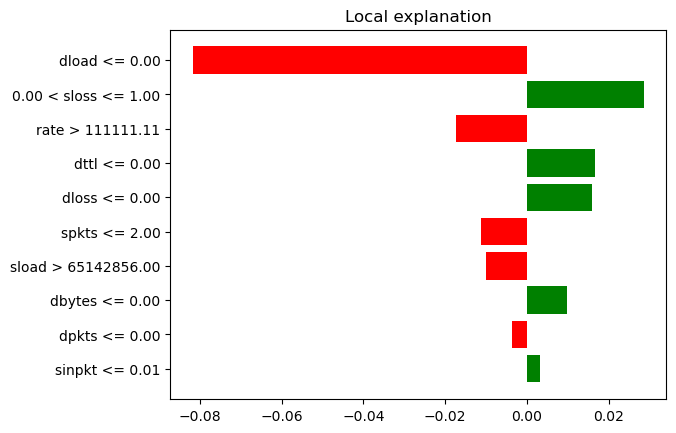

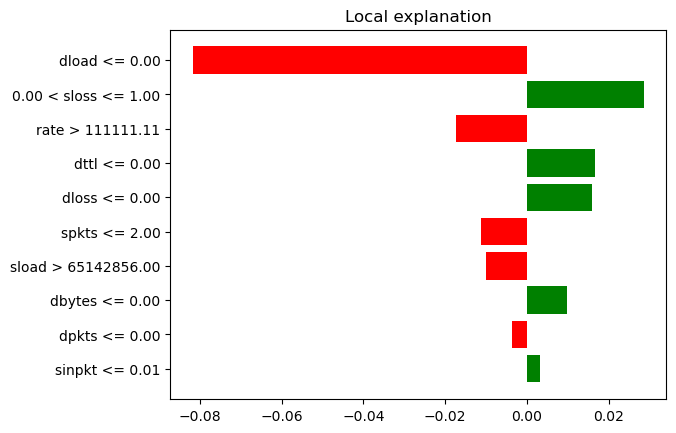

In [13]:
expknn.as_pyplot_figure()

In [14]:
expknn.as_list()

[('dload <= 0.00', -0.0817452477900632),
 ('0.00 < sloss <= 1.00', 0.02860196871763018),
 ('rate > 111111.11', -0.017348868644121603),
 ('dttl <= 0.00', 0.016766088762218453),
 ('dloss <= 0.00', 0.016001477493672926),
 ('spkts <= 2.00', -0.01129148207257992),
 ('sload > 65142856.00', -0.009973649579037227),
 ('dbytes <= 0.00', 0.00994007953793771),
 ('dpkts <= 0.00', -0.0036314351065688797),
 ('sinpkt <= 0.01', 0.003250698107320048)]

DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier()
y_pred_dt_fit = dt.fit(X_train, y_train)
y_pred_dt = y_pred_dt_fit.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
confusion_matrix(y_test, y_pred_dt)

array([[6806,  578],
       [ 662, 8421]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7384
           1       0.94      0.93      0.93      9083

    accuracy                           0.92     16467
   macro avg       0.92      0.92      0.92     16467
weighted avg       0.92      0.92      0.92     16467



In [17]:
expdt = explainer.explain_instance(X_test.iloc[0],dt.predict_proba)

Intercept 0.8762438789247129
Prediction_local [0.6279551]
Right: 1.0


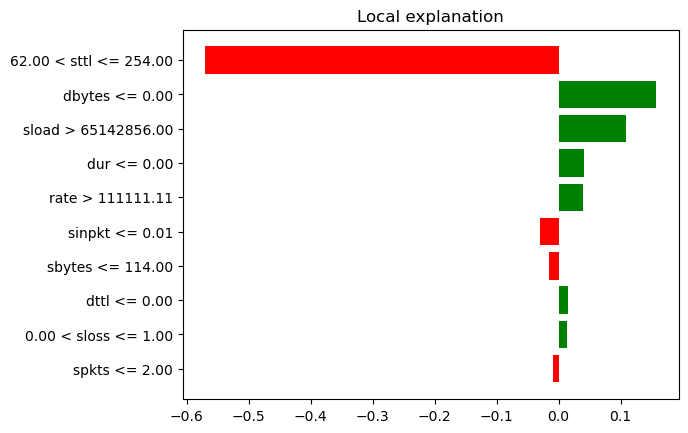

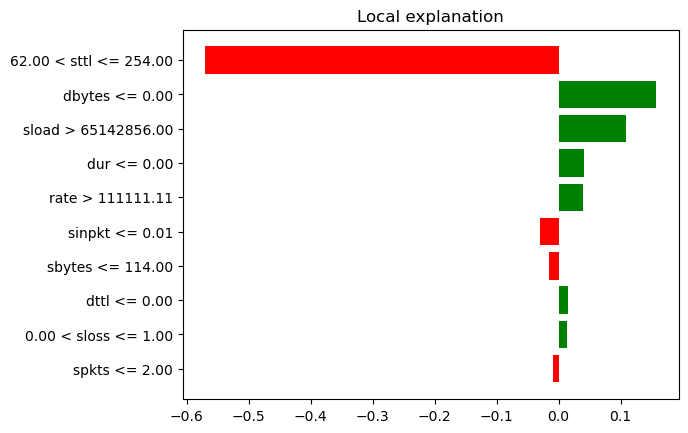

In [18]:
expdt.as_pyplot_figure()

RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred_rf_fit =rf.fit(X_train, y_train)
y_pred_rf = y_pred_rf_fit.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
confusion_matrix(y_test, y_pred_rf)

array([[6912,  472],
       [ 652, 8431]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7384
           1       0.95      0.93      0.94      9083

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467



In [21]:
exprf = explainer.explain_instance(X_test.iloc[0],rf.predict_proba)

Intercept 0.6555703458759611
Prediction_local [0.58152492]
Right: 1.0


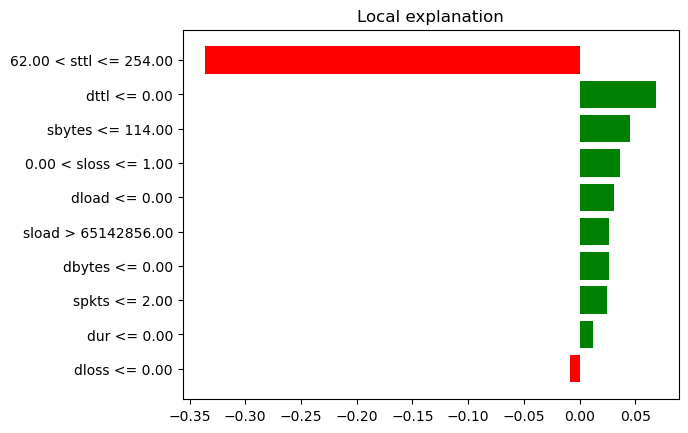

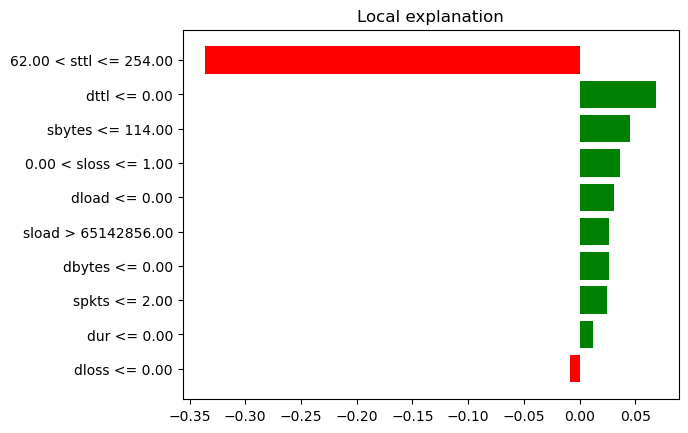

In [22]:
exprf.as_pyplot_figure()

In [24]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

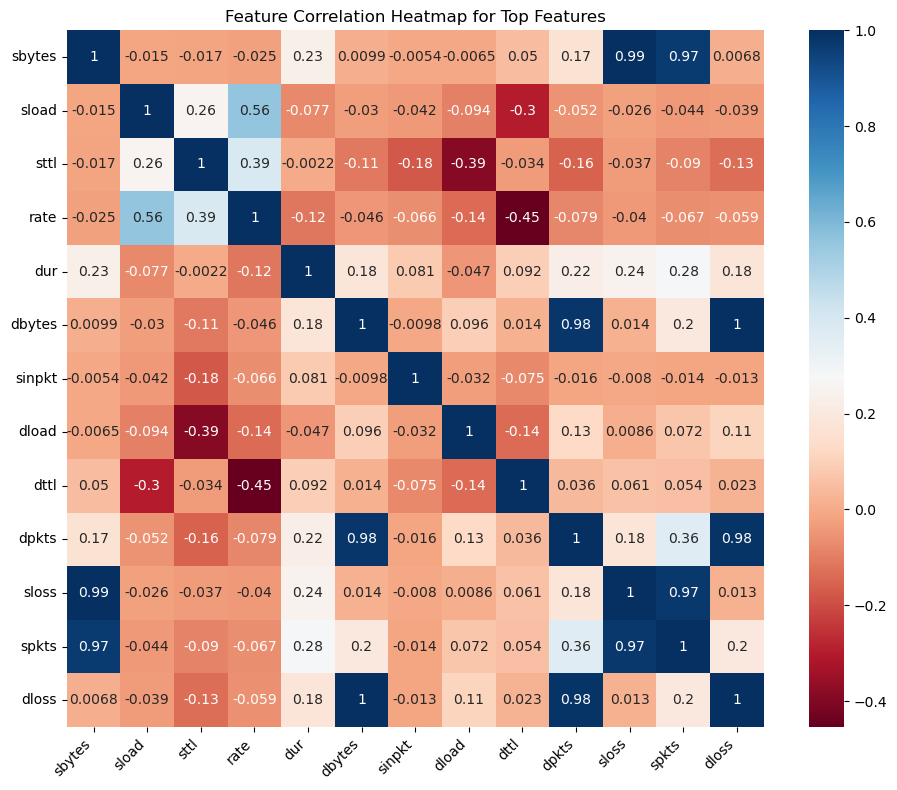

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

num_top_features = 13  # Choose the number of top features you want
top_features = feature_importance_df.head(num_top_features)['Feature'].tolist()
# Create a new feature matrix with only the top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
# Compute and plot feature correlation for top features
X_top_features = X_train_top
corr = X_top_features.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='RdBu', square=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Feature Correlation Heatmap for Top Features')
plt.tight_layout()
plt.show()
